# Bitcoin analysis

bitcoin vs. sp500, and bitcoin vs. coinindex

## Extract BTC data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
import seaborn as sns

%matplotlib inline

# scraper BTC data
scraper = CmcScraper("BTC")
btc_df = scraper.get_dataframe()
btc_df = pd.DataFrame(btc_df, columns=['Date','Close'])
btc_df.set_index('Date', inplace=True)
btc_df = btc_df.rename(columns = {'Close':'BTC'})
btc_df = btc_df.iloc[::-1]
btc_df.index = btc_df.index.tz_localize("UTC")
print(btc_df.describe())
print("Skewness : ")
print(btc_df.skew())
print("Kurtosis : ")
print(btc_df.kurt())

                BTC
count   3242.000000
mean    9811.727629
std    15456.704221
min       68.431000
25%      448.345497
50%     3680.882385
75%     9632.706126
max    67566.830088
Skewness : 
BTC    2.037086
dtype: float64
Kurtosis : 
BTC    3.035601
dtype: float64


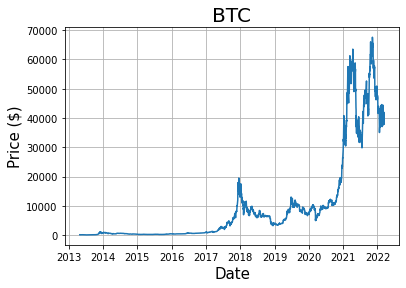

In [2]:
plt.plot(btc_df['BTC'])
plt.xlabel("Date", size=15)
plt.ylabel("Price ($)", size=15)
plt.title("BTC", size=20)
plt.grid()
plt.show()

Date
2013-04-28 00:00:00+00:00    0.000000
2013-04-29 00:00:00+00:00    0.076969
2013-04-30 00:00:00+00:00   -0.038328
2013-05-01 00:00:00+00:00   -0.158345
2013-05-02 00:00:00+00:00   -0.100692
                               ...   
2022-03-09 00:00:00+00:00    0.083786
2022-03-10 00:00:00+00:00   -0.060631
2022-03-11 00:00:00+00:00   -0.016291
2022-03-12 00:00:00+00:00    0.002811
2022-03-13 00:00:00+00:00   -0.027101
Name: BTC, Length: 3242, dtype: float64

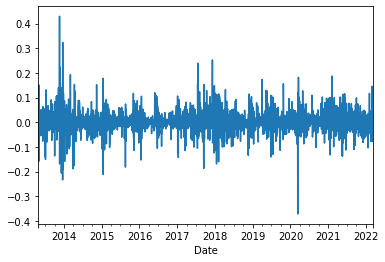

In [3]:
btc_daily_return = btc_df.pct_change().fillna(0).squeeze()
btc_daily_return.plot()
btc_daily_return

## Extract Coin Index

Use the first 10 cryptocurrency to build the coin index

In [4]:
top_10_coins_name = ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'LUNA', 'ADA', 'SOL', 'AVAX']

def scraper_top_10_coins(top_10_coins):
    top_10_coins_df = pd.DataFrame(columns=['Date'])
    for coins in top_10_coins_name:
        scraper = CmcScraper(coins)
        coins_df = scraper.get_dataframe()
        coins_df = pd.DataFrame(coins_df, columns=['Date','Close', 'Market Cap'])
        coins_df = coins_df.rename(columns = {'Close':coins+' Close'})
        coins_df = coins_df.rename(columns = {'Market Cap':coins+' Market Cap'})
        top_10_coins_df = top_10_coins_df.merge(coins_df, on='Date', how='outer')
    
    top_10_coins_df.set_index('Date', inplace=True)
    top_10_coins_df = top_10_coins_df.fillna(0)
    top_10_coins_df = top_10_coins_df.iloc[::-1]
    top_10_coins_df.index = top_10_coins_df.index.tz_localize("UTC")
    return top_10_coins_df

top_10_coins_df = scraper_top_10_coins(top_10_coins_name)
top_10_coins_df

,BTC Close,BTC Market Cap,ETH Close,ETH Market Cap,USDT Close,USDT Market Cap,BNB Close,BNB Market Cap,USDC Close,USDC Market Cap,XRP Close,XRP Market Cap,LUNA Close,LUNA Market Cap,ADA Close,ADA Market Cap,SOL Close,SOL Market Cap,AVAX Close,AVAX Market Cap
Date,,,,,,,,,,,,,,,,,,,,
2013-04-28 00:00:00+00:00,134.210007,1.488567e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
2013-04-29 00:00:00+00:00,144.539993,1.603769e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
2013-04-30 00:00:00+00:00,139.000000,1.542813e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
2013-05-01 00:00:00+00:00,116.989998,1.298955e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
2013-05-02 00:00:00+00:00,105.209999,1.168517e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 00:00:00+00:00,41982.926355,7.967877e+11,2729.783504,3.272846e+11,1.000294,8.005182e+10,393.555742,6.498265e+10,1.000450,5.243033e+10,0.767236,3.678458e+10,99.448183,3.612089e+10,0.849293,2.859937e+10,88.202065,2.845866e+10,77.716046,2.067042e+10
2022-03-10 00:00:00+00:00,39437.459774,7.485134e+11,2608.048498,3.127251e+11,1.000565,8.007896e+10,372.159025,6.144969e+10,0.999801,5.253656e+10,0.737465,3.535724e+10,101.588007,3.674814e+10,0.806316,2.715213e+10,82.939090,2.648619e+10,74.004094,1.969167e+10
2022-03-11 00:00:00+00:00,38794.973137,7.363531e+11,2559.563044,3.069456e+11,1.000200,8.006370e+10,372.184041,6.145382e+10,0.999341,5.246616e+10,0.802155,3.854044e+10,88.218844,3.310637e+10,0.790125,2.661639e+10,80.744997,2.607690e+10,71.235477,1.896223e+10


$CoinIndex = \sum_{i=1}^{10}{Price_i \frac{MarketCap_i}{TotalCap}}$

In [5]:
top_10_coins_df['Total Market Map'] = top_10_coins_df.loc[:, top_10_coins_df.columns.str.endswith('Market Cap')].sum(1)
#top_10_coins_df['CoinIndex'] = np.zeros(len(top_10_coins_df))
top_10_coins_df['CoinIndex'] = 0

def weighted_coins_index(top_10_coins_name, top_10_coins_df):
    for coins in top_10_coins_name:
        w = top_10_coins_df[coins+' Market Cap'] / top_10_coins_df['Total Market Map']
        #p = top_10_coins_df[coins+' Close'] / top_10_coins_df[coins+' Close'].iloc[-1]
        p = top_10_coins_df[coins+' Close']
        top_10_coins_df['CoinIndex'] += w * p
        #top_10_coins_df['CoinIndex'] = top_10_coins_df['CoinIndex'] + top_10_coins_df.apply(lambda x: x[coins+' Close']* (x[coins+' Market Cap'] / x['Total Market Map']), axis=1)

    top_10_coins_df['CoinIndex'] /= top_10_coins_df['CoinIndex'].iloc[0]
    return top_10_coins_df

weighted_coins_df = weighted_coins_index(top_10_coins_name, top_10_coins_df)
weighted_coins_df = weighted_coins_df.iloc[: , -1]
print(weighted_coins_df.describe())
print(weighted_coins_df)

count    3242.000000
mean       48.119080
std        71.596661
min         0.509880
25%         3.170308
50%        18.743051
75%        54.867865
max       344.190437
Name: CoinIndex, dtype: float64
Date
2013-04-28 00:00:00+00:00      1.000000
2013-04-29 00:00:00+00:00      1.076969
2013-04-30 00:00:00+00:00      1.035690
2013-05-01 00:00:00+00:00      0.871694
2013-05-02 00:00:00+00:00      0.783921
                                ...    
2022-03-09 00:00:00+00:00    173.997103
2022-03-10 00:00:00+00:00    161.524485
2022-03-11 00:00:00+00:00    158.573856
2022-03-12 00:00:00+00:00    159.240124
2022-03-13 00:00:00+00:00    154.171045
Name: CoinIndex, Length: 3242, dtype: float64


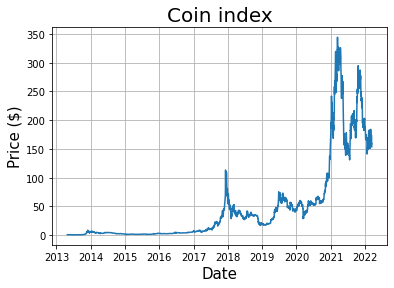

In [6]:
plt.plot(weighted_coins_df)
plt.xlabel("Date", size=15)
plt.ylabel("Price ($)", size=15)
plt.title("Coin index", size=20)
plt.grid()
plt.show()

count    3242.000000
mean        0.002543
std         0.044516
min        -0.379268
25%        -0.015118
50%         0.001006
75%         0.019256
max         0.434503
Name: CoinIndex, dtype: float64

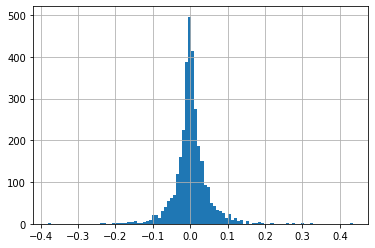

In [7]:
weighted_coins_return = weighted_coins_df.pct_change().fillna(0).squeeze()
weighted_coins_return.hist(bins=100)
weighted_coins_return.describe()

$CoinIndex2 = \sum_{i=1}^{10}{ScalePrice_i \frac{MarketCap_i}{TotalCap}}$

In [8]:
top_10_coins_df['CoinIndex2'] = 0

def scale_weighted_coins_index(top_10_coins_name, top_10_coins_df):
    for coins in top_10_coins_name:
        w = top_10_coins_df[coins+' Market Cap'] / top_10_coins_df['Total Market Map']
        p = top_10_coins_df[coins+' Close'] / top_10_coins_df[coins+' Close'].iloc[-1]
        #p = top_10_coins_df[coins+' Close']
        top_10_coins_df['CoinIndex2'] += w * p
        #top_10_coins_df['CoinIndex'] = top_10_coins_df['CoinIndex'] + top_10_coins_df.apply(lambda x: x[coins+' Close']* (x[coins+' Market Cap'] / x['Total Market Map']), axis=1)

    top_10_coins_df['CoinIndex2'] /= top_10_coins_df['CoinIndex2'].iloc[0]
    return top_10_coins_df

scale_weighted_coins_df = scale_weighted_coins_index(top_10_coins_name, top_10_coins_df)
scale_weighted_coins_df = scale_weighted_coins_df.iloc[: , -1]
print(scale_weighted_coins_df.describe())
print(scale_weighted_coins_df)

count    3242.000000
mean       78.061020
std       115.928738
min         0.509880
25%         3.305381
50%        41.060239
75%        77.570480
max       517.584749
Name: CoinIndex2, dtype: float64
Date
2013-04-28 00:00:00+00:00      1.000000
2013-04-29 00:00:00+00:00      1.076969
2013-04-30 00:00:00+00:00      1.035690
2013-05-01 00:00:00+00:00      0.871694
2013-05-02 00:00:00+00:00      0.783921
                                ...    
2022-03-09 00:00:00+00:00    307.624645
2022-03-10 00:00:00+00:00    292.601922
2022-03-11 00:00:00+00:00    287.902055
2022-03-12 00:00:00+00:00    288.464198
2022-03-13 00:00:00+00:00    282.018187
Name: CoinIndex2, Length: 3242, dtype: float64


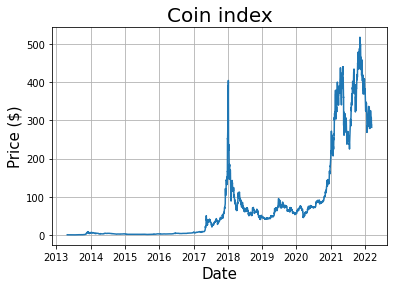

In [9]:
plt.plot(scale_weighted_coins_df)
plt.xlabel("Date", size=15)
plt.ylabel("Price ($)", size=15)
plt.title("Coin index", size=20)
plt.grid()
plt.show()

count    3242.000000
mean        0.002725
std         0.044811
min        -0.302680
25%        -0.013014
50%         0.001348
75%         0.018527
max         0.523572
Name: CoinIndex2, dtype: float64

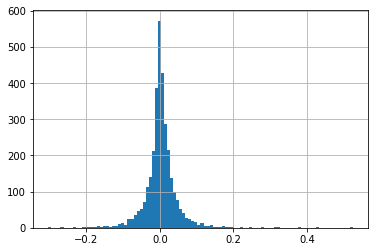

In [10]:
scale_weighted_coins_return = scale_weighted_coins_df.pct_change().fillna(0).squeeze()
scale_weighted_coins_return.hist(bins=100)
scale_weighted_coins_return.describe()

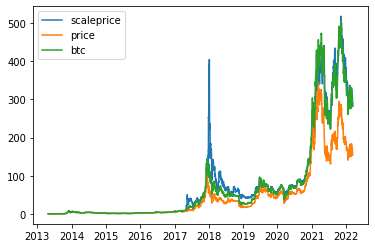

In [11]:
plt.figure()
plt.plot(scale_weighted_coins_df, label="scaleprice")
plt.plot(weighted_coins_df, label="price")
plt.plot((btc_daily_return+1).cumprod(), label="btc")
plt.legend()
plt.show()

## Extract SP500 data



In [12]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2013, 4, 28)
SP500 = web.DataReader(['sp500'], 'fred', start)
SP500=SP500.rename(columns = {'sp500':'SP500'})
SP500.index = SP500.index.tz_localize("UTC")
print(SP500.describe())
print(SP500)

             SP500
count  2235.000000
mean   2670.891168
std     805.187940
min    1573.090000
25%    2052.970000
50%    2488.650000
75%    3000.420000
max    4796.560000
                             SP500
DATE                              
2013-04-29 00:00:00+00:00  1593.61
2013-04-30 00:00:00+00:00  1597.57
2013-05-01 00:00:00+00:00  1582.70
2013-05-02 00:00:00+00:00  1597.59
2013-05-03 00:00:00+00:00  1614.42
...                            ...
2022-03-07 00:00:00+00:00  4201.09
2022-03-08 00:00:00+00:00  4170.70
2022-03-09 00:00:00+00:00  4277.88
2022-03-10 00:00:00+00:00  4259.52
2022-03-11 00:00:00+00:00  4204.31

[2315 rows x 1 columns]


<AxesSubplot:title={'center':'S&P 500 Price'}, xlabel='DATE'>

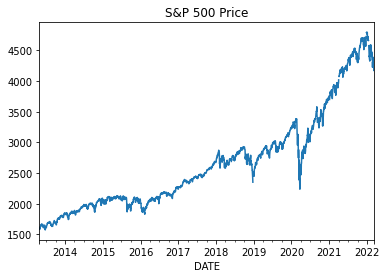

In [13]:
SP500['SP500'].plot(title='S&P 500 Price')

<AxesSubplot:xlabel='DATE'>

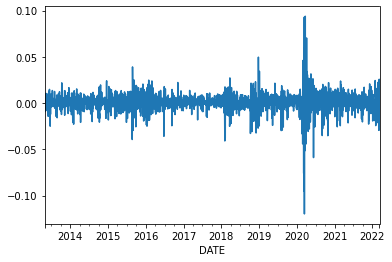

In [14]:
sp500_daily_return = SP500['SP500'].pct_change(1).fillna(0)
sp500_daily_return
sp500_daily_return.plot()

count    2315.000000
mean        1.676198
std         0.505249
min         0.987124
25%         1.288534
50%         1.561643
75%         1.882782
max         3.009871
Name: SP500, dtype: float64
DATE
2013-04-29 00:00:00+00:00    1.000000
2013-04-30 00:00:00+00:00    1.002485
2013-05-01 00:00:00+00:00    0.993154
2013-05-02 00:00:00+00:00    1.002497
2013-05-03 00:00:00+00:00    1.013058
                               ...   
2022-03-07 00:00:00+00:00    2.636210
2022-03-08 00:00:00+00:00    2.617140
2022-03-09 00:00:00+00:00    2.684396
2022-03-10 00:00:00+00:00    2.672875
2022-03-11 00:00:00+00:00    2.638230
Name: SP500, Length: 2315, dtype: float64


<AxesSubplot:xlabel='DATE'>

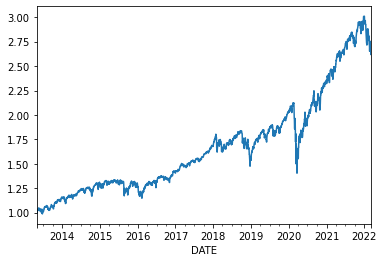

In [15]:
sp500_cumulative_return = ((sp500_daily_return+1).cumprod())
print(sp500_cumulative_return.describe())
print(sp500_cumulative_return)
sp500_cumulative_return.plot()

In [16]:
import pyfolio as pf
# silence warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


## BTC vs. SP500

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,82.40,2017-12-15,2018-12-14,2020-11-17,763
1,78.88,2013-12-04,2015-01-14,2017-05-03,891
2,51.96,2021-10-20,2022-01-21,NaT,NaN
3,51.76,2013-04-29,2013-07-05,2013-11-05,137
4,50.35,2021-05-05,2021-07-20,2021-10-20,121


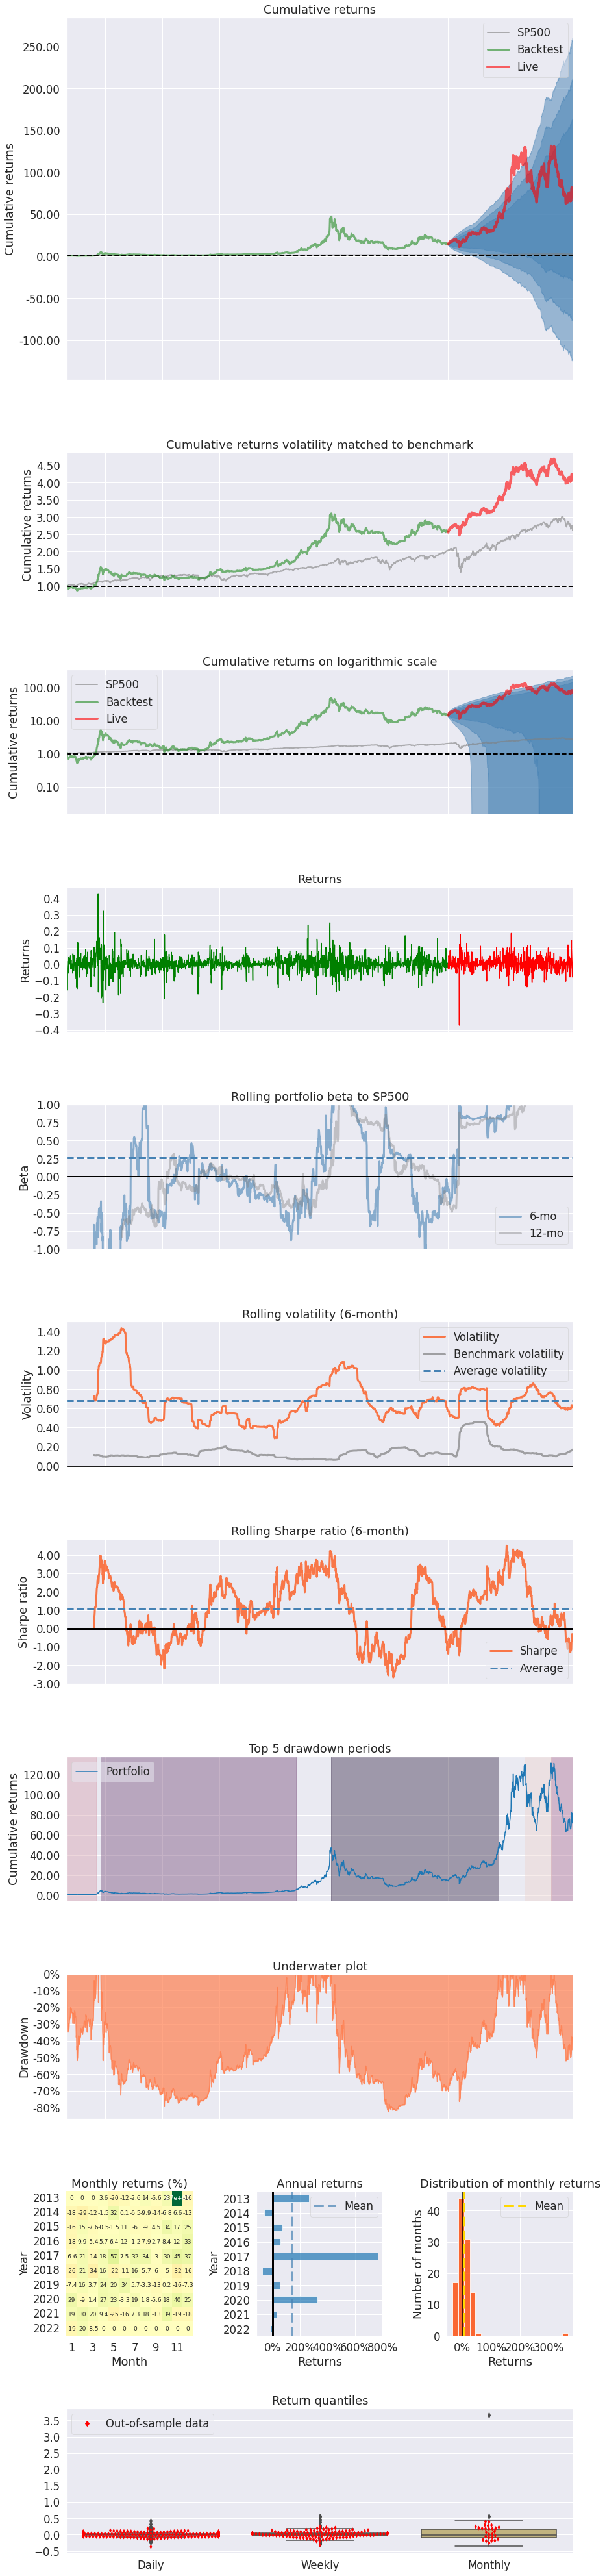

In [17]:
pf.create_returns_tear_sheet(btc_daily_return, benchmark_rets=sp500_daily_return, live_start_date='2020-01')
#pf.create_returns_tear_sheet(sp500_daily_return, benchmark_rets=btc_daily_return.squeeze())

## BTC vs. CoinIndex


In [ ]:
pf.create_returns_tear_sheet(btc_daily_return, benchmark_rets=weighted_coins_return, live_start_date='2020-01')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,84.53,2013-12-04,2015-01-14,2017-01-04,806
1,83.40,2017-12-16,2018-12-15,2020-11-30,771
2,53.06,2021-04-13,2021-07-20,2021-10-19,136
3,52.66,2013-04-29,2013-07-05,2013-10-15,122
4,48.15,2021-11-08,2022-01-22,NaT,NaN
